In [1]:
import ROOT

Welcome to JupyROOT 6.22/06


In [2]:
ntuple_file = ROOT.TFile('/home/newhouse/public/Analysis/HNL/DHNLAlgorithm/run/15_tracking_sys/submitDir_normal/data-tree/files.root')

In [3]:
outTree = ntuple_file.Get('outTree')

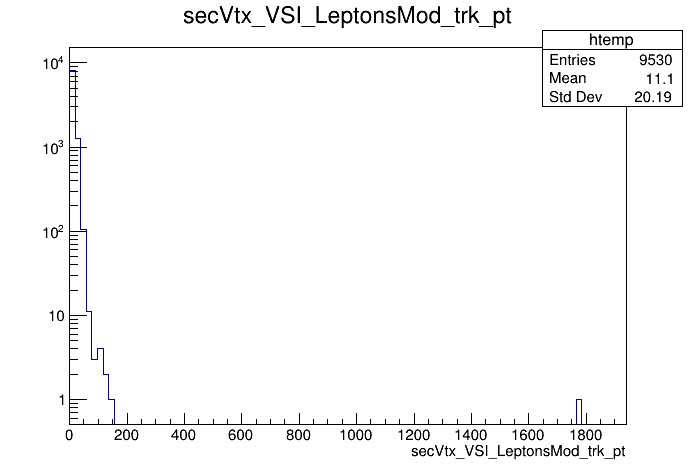

In [4]:
c = ROOT.TCanvas()
outTree.Draw('secVtx_VSI_LeptonsMod_trk_pt')
c.SetLogy()
# c.SetLogx()
c.Draw()

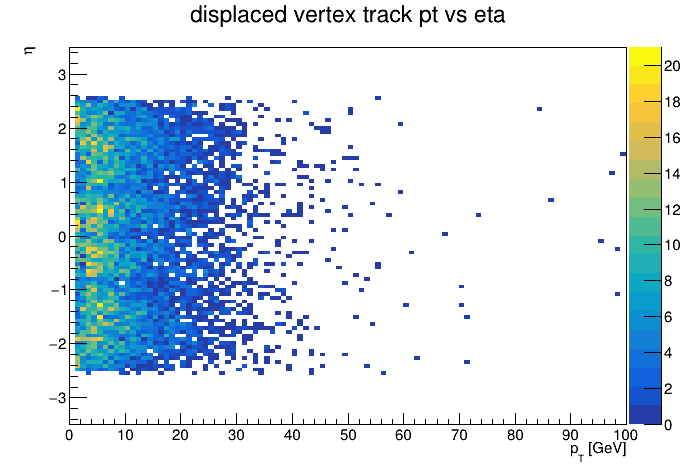

In [31]:
c = ROOT.TCanvas()

# Make histogram
h_pt_eta_2d = ROOT.TH2D("h_pt_eta_2d", "displaced vertex track pt vs eta", 
                        100, 0, 100, # x axis: nbins, low, high
                        100, -3.5, 3.5, ) # y axis: nbins, low, high

# set some parameters
h_pt_eta_2d.GetXaxis().SetTitle('p_{T} [GeV]')
h_pt_eta_2d.GetYaxis().SetTitle('#eta')
ROOT.gStyle.SetOptStat(0)

# fill the histogram
outTree.Draw('secVtx_VSI_LeptonsMod_trk_eta:secVtx_VSI_LeptonsMod_trk_pt >> h_pt_eta_2d', '', 'colz')

c.Draw()

In [26]:
calib_file = ROOT.TFile('/cvmfs/atlas.cern.ch/repo/sw/database/GroupData/InDetTrackSystematicsTools/CalibData_21.2_2018-v15/TrackingRecommendations_final_rel21.root')

OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_Loose = calib_file.Get('OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_Loose')
OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSIBL_10_Loose = calib_file.Get('OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSIBL_10_Loose')
OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSPP0_25_Loose = calib_file.Get('OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSPP0_25_Loose')
OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSQGS_BIC_Loose = calib_file.Get('OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSQGS_BIC_Loose')

OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_TightPrimary = calib_file.Get('OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_TightPrimary')
OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSIBL_10_TightPrimary = calib_file.Get('OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSIBL_10_TightPrimary')
OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSPP0_25_TightPrimary = calib_file.Get('OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSPP0_25_TightPrimary')
OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSQGS_BIC_TightPrimary = calib_file.Get('OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSQGS_BIC_TightPrimary')
# calib_file.ls()

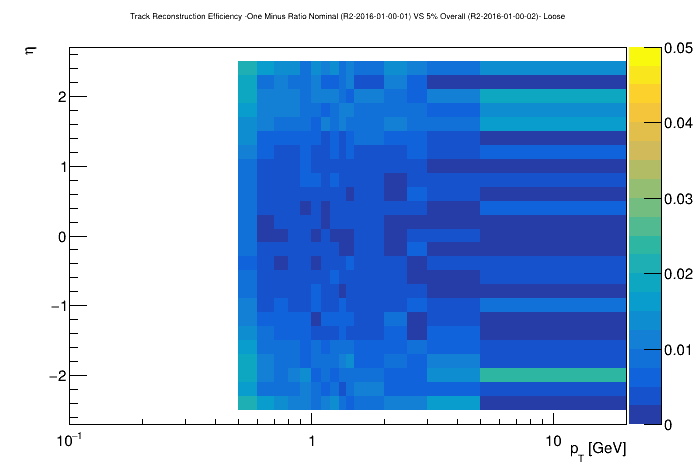

In [27]:
# get calib file

c = ROOT.TCanvas()

# Make histogram
# h_pt_eta_2d = ROOT.TH2D("h_pt_eta_2d", "displaced vertex track pt vs eta", 
#                         100, 0, 100, # x axis: nbins, low, high
#                         100, -3.5, 3.5, ) # y axis: nbins, low, high

# set some parameters
# h_pt_eta_2d.GetXaxis().SetTitle('p_{T} [GeV]')
# h_pt_eta_2d.GetYaxis().SetTitle('#eta')
# ROOT.gStyle.SetOptStat(0)

# fill the histogram
h_overall_loose = OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_Loose.Draw('colz')
c.SetLogx()

c.Draw()

In [34]:
OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_Loose.Multiply(h_pt_eta_2d)
# Error in <TH2F::Multiply>: Attempt to multiply histograms with different number of bins
# Thought so
# going to have to loop

False

Error in <TH2F::Multiply>: Attempt to multiply histograms with different number of bins


Total uncertainty: 0.476 %
Total uncertainty: 0.273 %
Total uncertainty: 0.207 %
Total uncertainty: 0.306 %
Total uncertainty: 0.717 %
Total uncertainty: 0.359 %
Total uncertainty: 0.283 %
Total uncertainty: 0.381 %


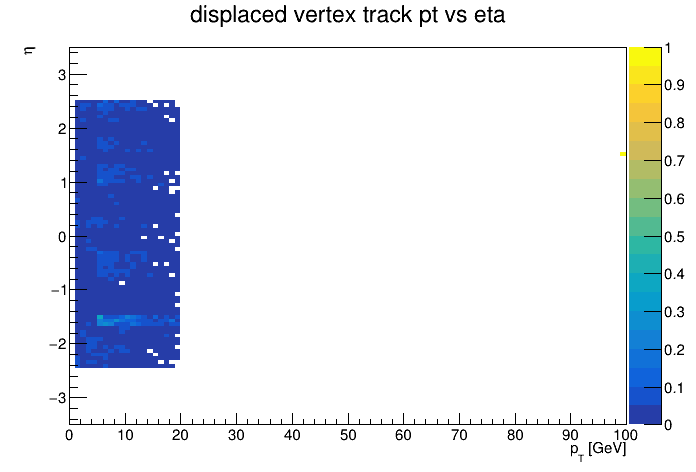

In [127]:
h_pt_eta_2d_unc = h_pt_eta_2d.Clone()

unc_hist_list = [
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_Loose,
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSIBL_10_Loose,
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSPP0_25_Loose,
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSQGS_BIC_Loose,
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_TightPrimary,
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSIBL_10_TightPrimary,
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSPP0_25_TightPrimary,
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSQGS_BIC_TightPrimary,
    ]
'''    
    Total uncertainty: 0.476 % --- OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_Loose 
    Total uncertainty: 0.273 % --- OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSIBL_10_Loose 
    Total uncertainty: 0.207 % --- OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSPP0_25_Loose 
    Total uncertainty: 0.306 % --- OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSQGS_BIC_Loose 
    Total uncertainty: 0.717 % --- OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_TightPrimary 
    Total uncertainty: 0.359 % --- OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSIBL_10_TightPrimary 
    Total uncertainty: 0.283 % --- OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSPP0_25_TightPrimary 
    Total uncertainty: 0.381 % --- OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSQGS_BIC_TightPrimary 
'''
for unc_hist in unc_hist_list:
    for xi in range (h_pt_eta_2d.GetNbinsX()):
        for yi in range (h_pt_eta_2d.GetNbinsY()):
            # Get the pt and eta associated with this bin
            pt, eta = h_pt_eta_2d.GetXaxis().GetBinLowEdge(xi), h_pt_eta_2d.GetYaxis().GetBinLowEdge(yi)
            # Get the bin from the uncertainty histogram associated with this bin
            pt_unc_bin = unc_hist.GetXaxis().FindBin(pt)
            eta_unc_bin = unc_hist.GetYaxis().FindBin(eta)

            h_pt_eta_2d_unc.SetBinContent(
                xi, yi,
                h_pt_eta_2d.GetBinContent(xi,yi) * 
                unc_hist.GetBinContent(pt_unc_bin, eta_unc_bin)
                )
        
    h_pt_eta_2d_unc.Draw('colz')
    c.Draw()

    print( f'Total uncertainty: {h_pt_eta_2d_unc.Integral() / h_pt_eta_2d.Integral() * 100:0.3f} %')

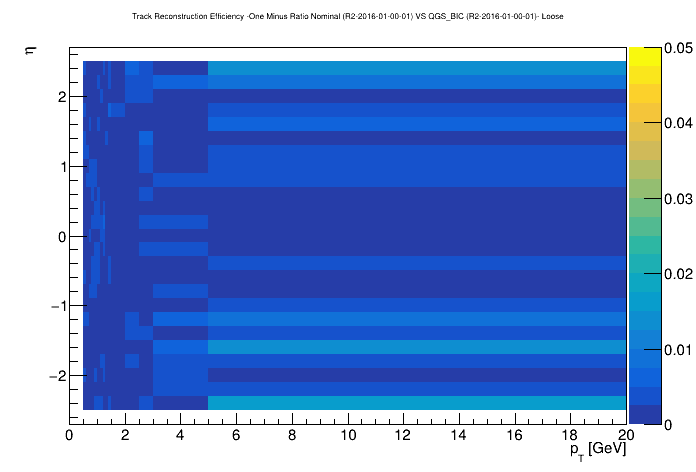

In [133]:
unc_hist_list = [
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_Loose,
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSIBL_10_Loose,
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSPP0_25_Loose,
    OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSQGS_BIC_Loose,
    # OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSOverall_5_TightPrimary,
    # OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSIBL_10_TightPrimary,
    # OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSPP0_25_TightPrimary,
    # OneMinusRatioEfficiencyVSEtaPt_AfterRebinning_NominalVSQGS_BIC_TightPrimary,
    ]

for unc_hist in unc_hist_list:
    unc_hist.Draw('colz')
    c.Draw()